# Import Required Libraries
Import the necessary libraries, including pandas, numpy, scipy, seaborn, and matplotlib.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Load and Inspect Data
Load the dataset and inspect the first few rows to understand its structure.

In [2]:
# Load and Inspect Data

# Load the dataset
data = pd.read_csv('/Users/yujin/Desktop/대학원/Human-AI interaction and data science/HAI5016_Final Presentation/diabetes_prediction_dataset 2.csv')

# Inspect the first few rows of the dataset
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Descriptive Statistics
Generate descriptive statistics for each column to summarize the central tendency, dispersion, and shape of the dataset’s distribution.

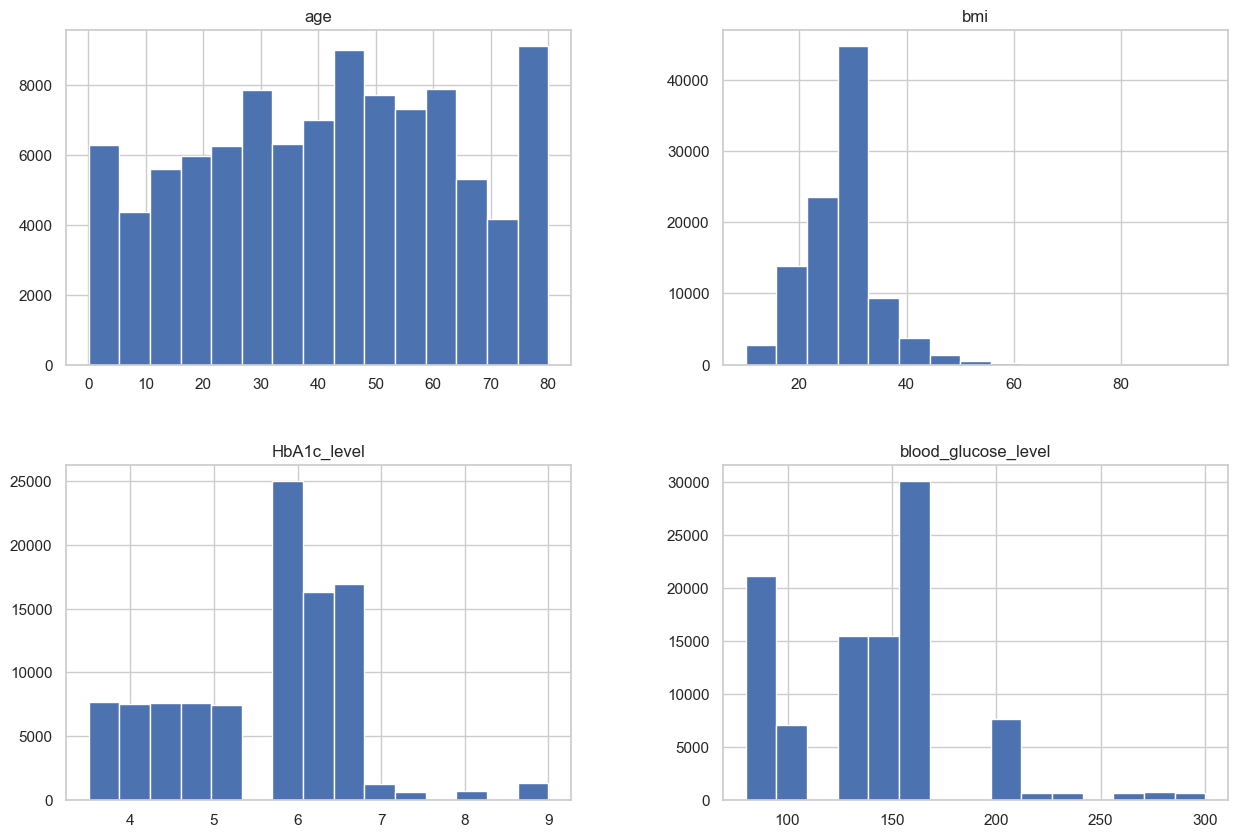

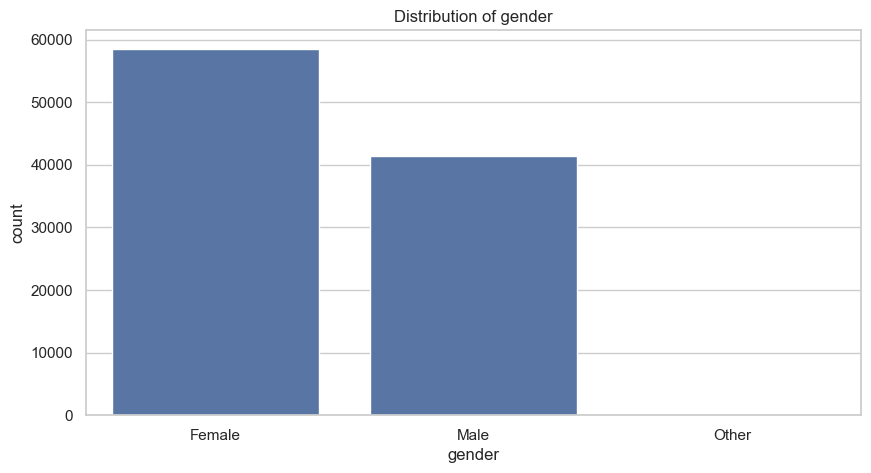

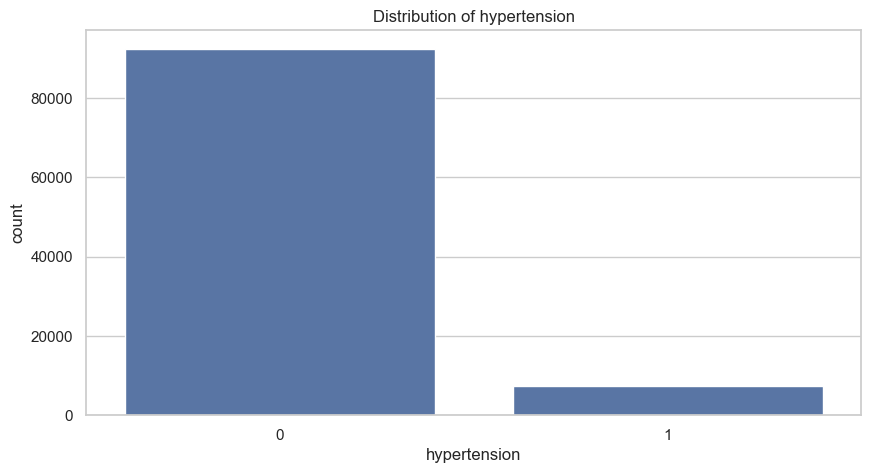

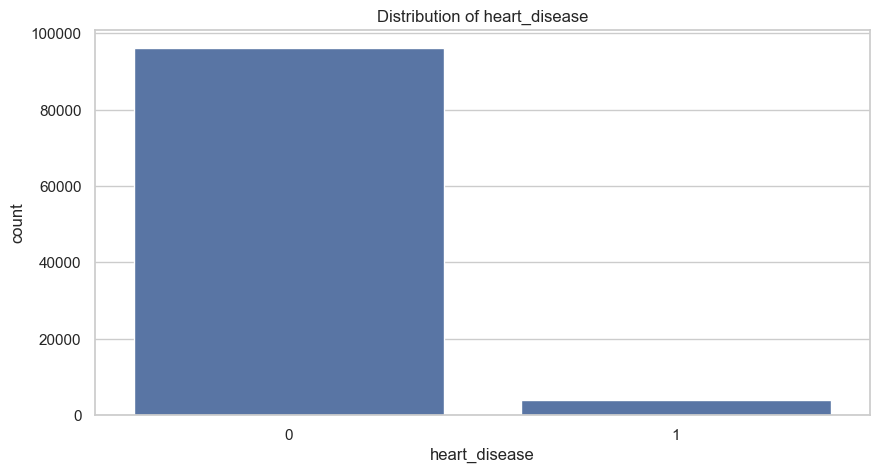

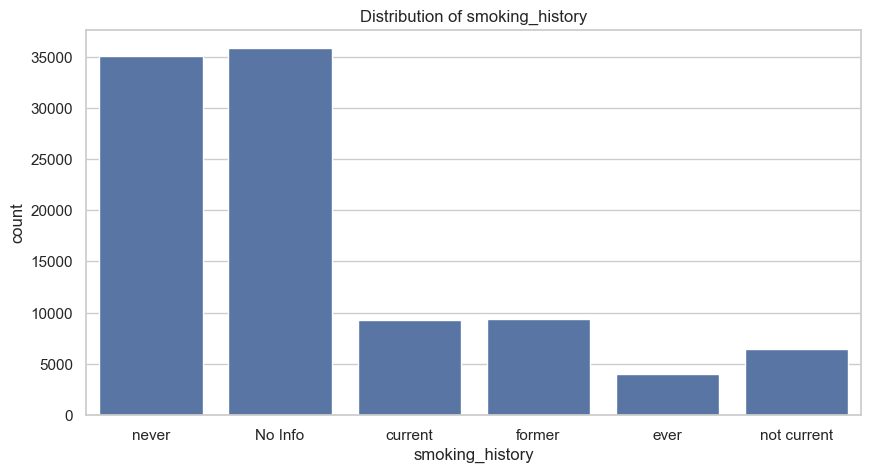

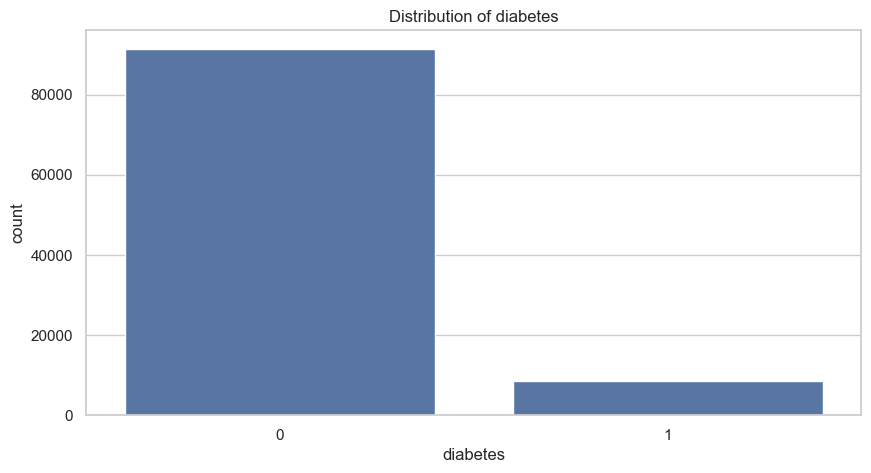

In [3]:
# Descriptive Statistics

# Generate descriptive statistics for each column
descriptive_stats = data.describe(include='all')
descriptive_stats

# Display the distribution of each numerical variable using histograms
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
data[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(2, 2))
plt.show()

# Display the distribution of categorical variables using count plots
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=data)
    plt.title(f'Distribution of {column}')
    plt.show()

# Correlation Matrix
Create a correlation matrix to show the correlation coefficients between variables.

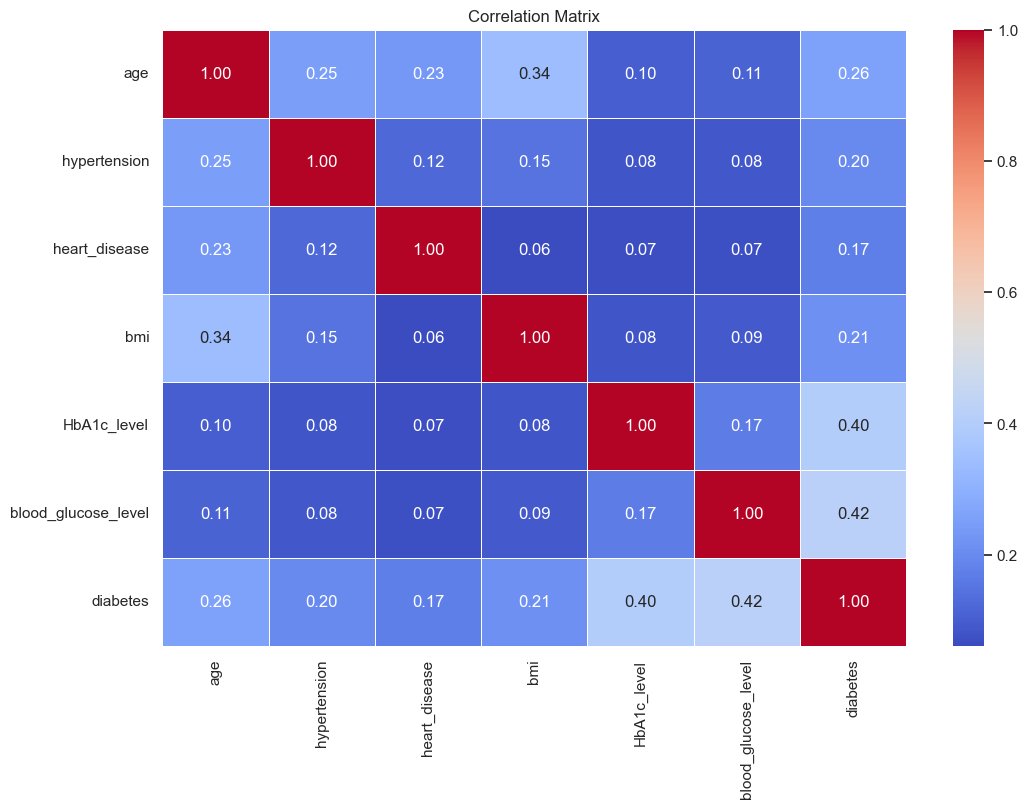

In [4]:
# Correlation Matrix

# Calculate the correlation matrix for numeric columns only
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Statistical Significance Tests
Perform statistical significance tests (e.g., t-tests, chi-square tests) to determine the relationships between variables.

T-test for age: t-statistic = 84.4477, p-value = 0.0000
T-test for bmi: t-statistic = 69.3982, p-value = 0.0000
T-test for HbA1c_level: t-statistic = 138.2831, p-value = 0.0000


T-test for blood_glucose_level: t-statistic = 146.1611, p-value = 0.0000
Chi-square test for gender: chi2 = 143.2183, p-value = 0.0000
Chi-square test for hypertension: chi2 = 3910.7085, p-value = 0.0000
Chi-square test for heart_disease: chi2 = 2945.8475, p-value = 0.0000
Chi-square test for smoking_history: chi2 = 1956.0944, p-value = 0.0000


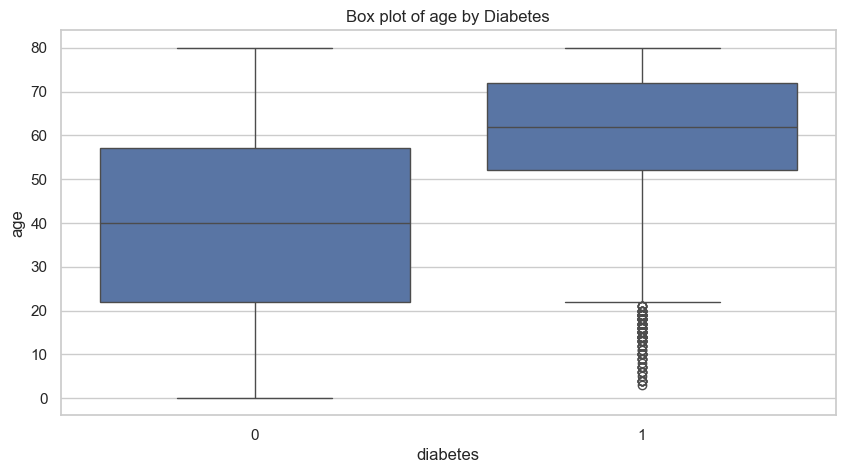

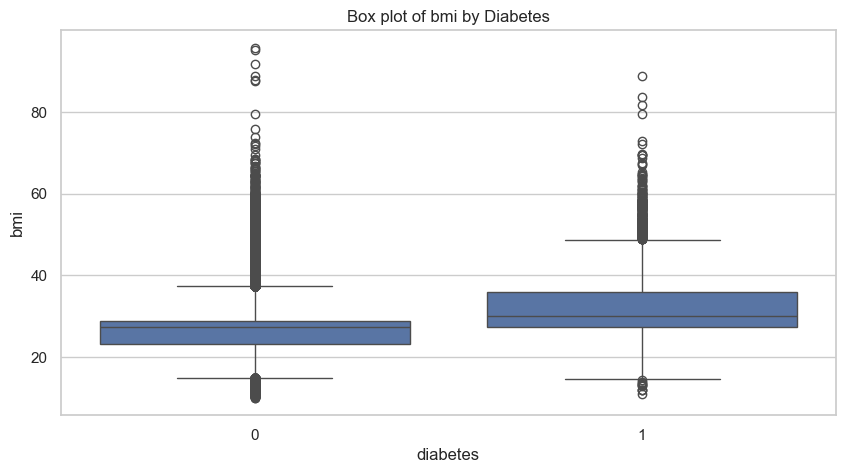

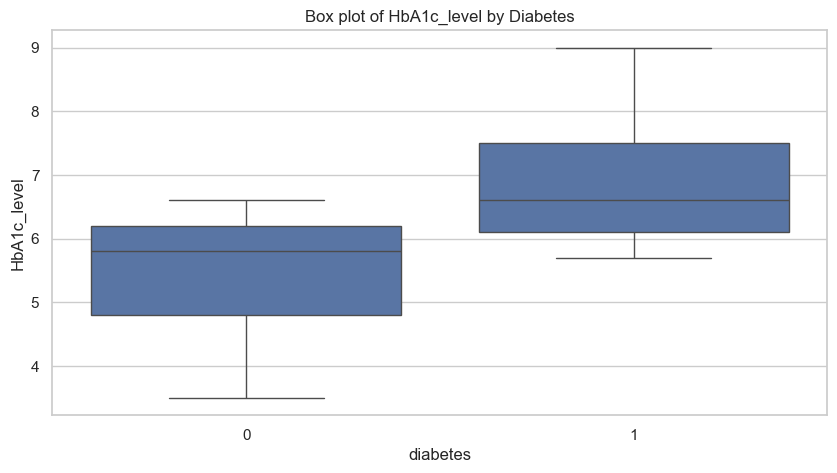

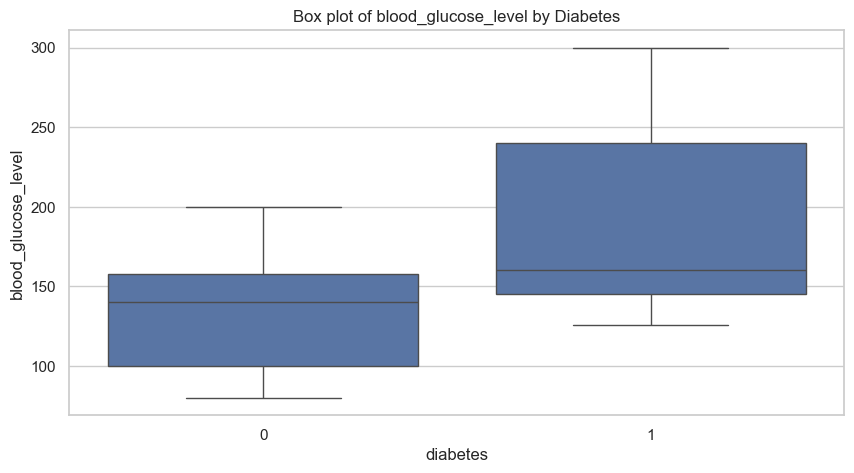

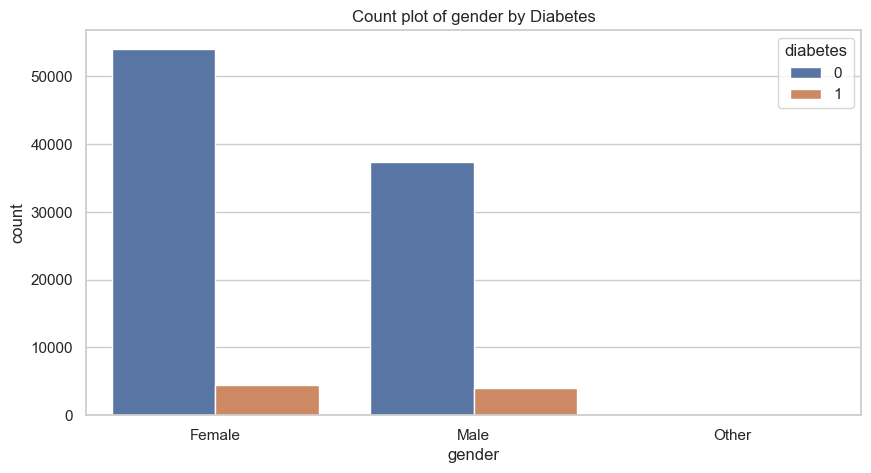

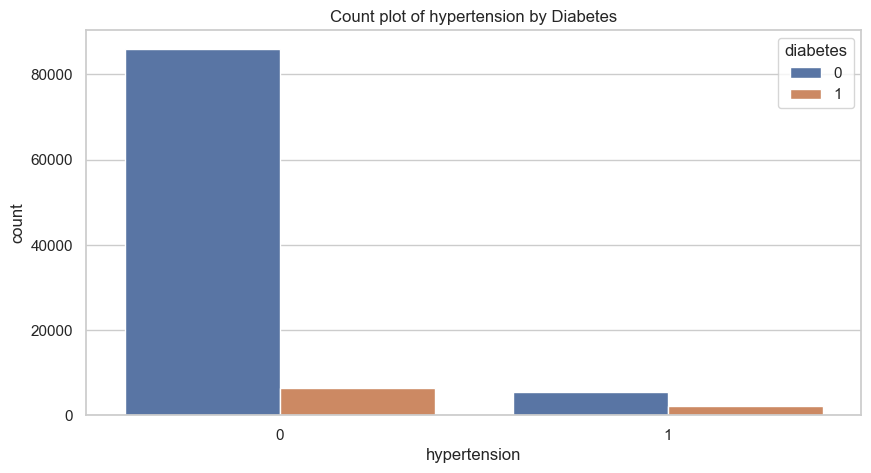

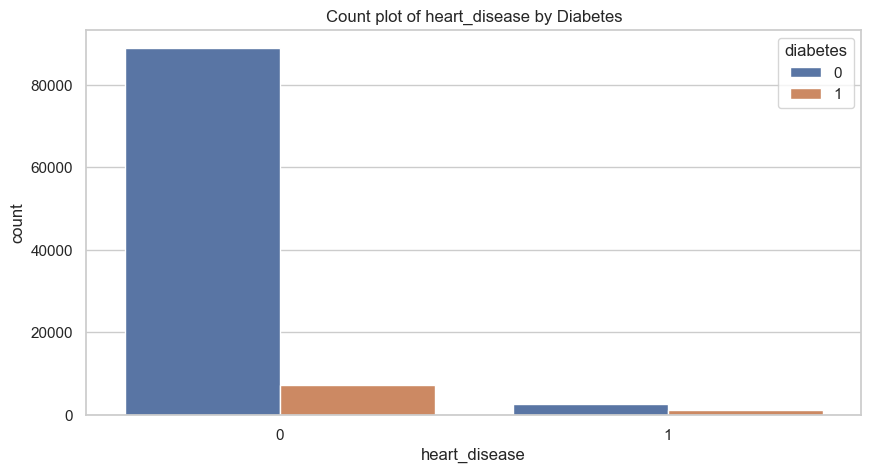

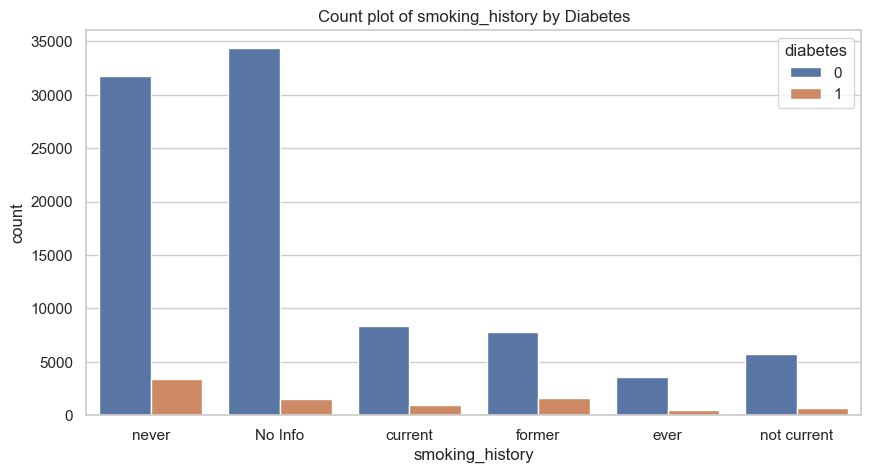

In [5]:
# Statistical Significance Tests

# Perform t-tests for numerical variables between diabetes and non-diabetes groups
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for column in numerical_columns:
    diabetes_group = data[data['diabetes'] == 1][column]
    non_diabetes_group = data[data['diabetes'] == 0][column]
    t_stat, p_value = stats.ttest_ind(diabetes_group, non_diabetes_group)
    print(f'T-test for {column}: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}')

# Perform chi-square tests for categorical variables
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'smoking_history']
for column in categorical_columns:
    contingency_table = pd.crosstab(data[column], data['diabetes'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f'Chi-square test for {column}: chi2 = {chi2:.4f}, p-value = {p:.4f}')

# Visualize the relationship between numerical variables and diabetes using box plots
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='diabetes', y=column, data=data)
    plt.title(f'Box plot of {column} by Diabetes')
    plt.show()

# Visualize the relationship between categorical variables and diabetes using count plots
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, hue='diabetes', data=data)
    plt.title(f'Count plot of {column} by Diabetes')
    plt.show()

# Visualization of Relationships
Use seaborn and matplotlib to create visualizations such as scatter plots, box plots, and heatmaps to illustrate the relationships between variables.

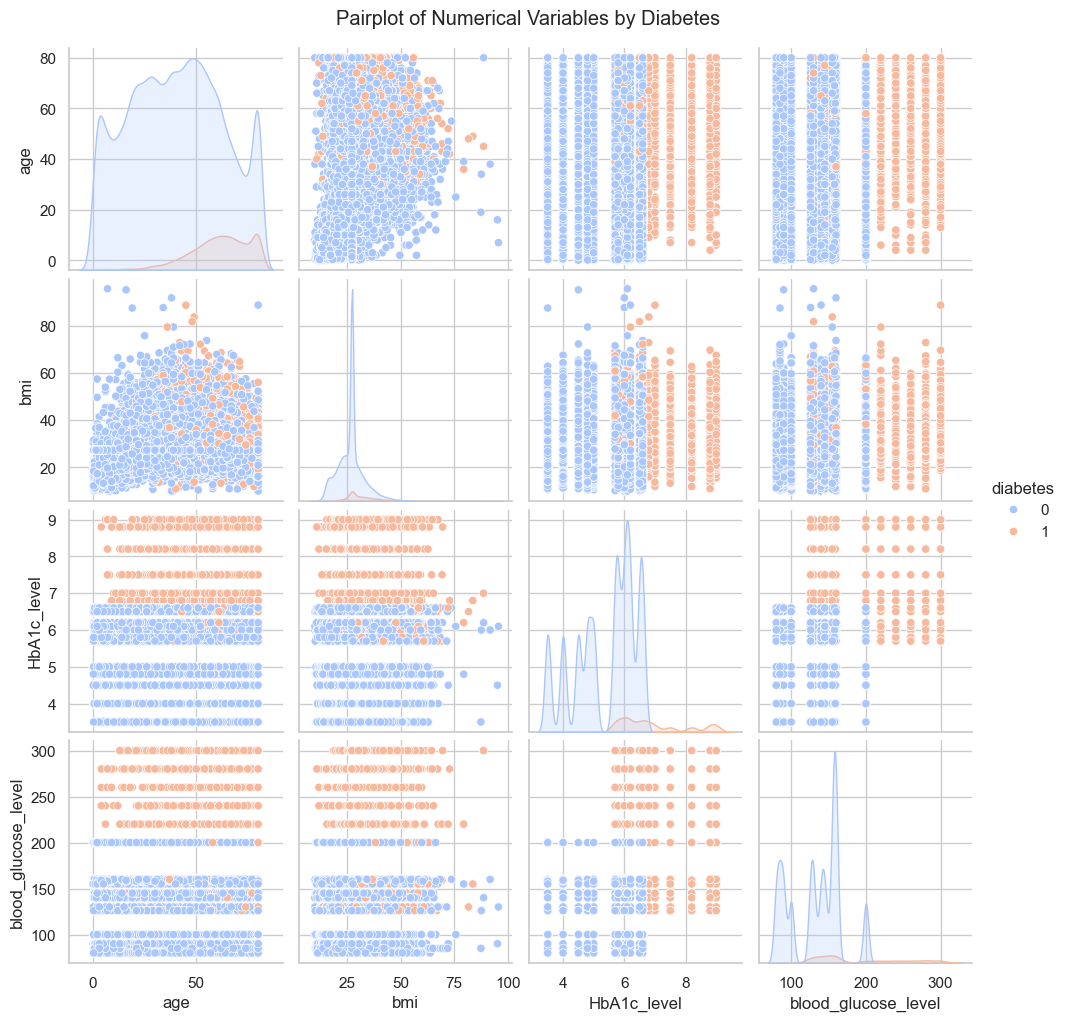

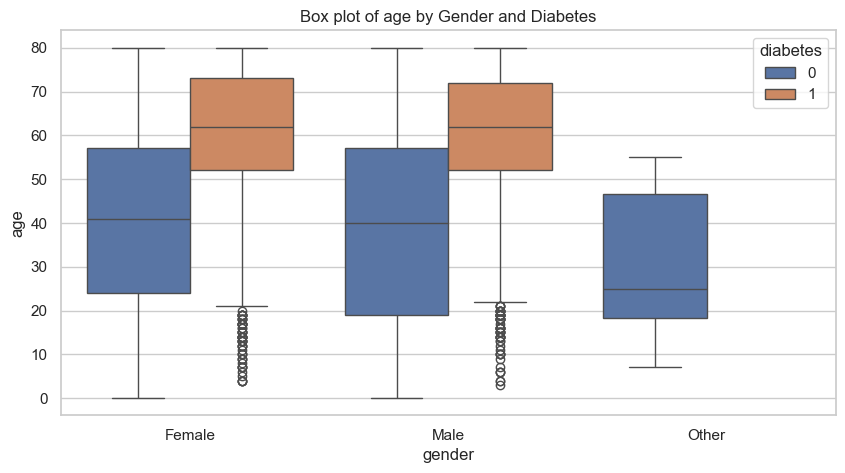

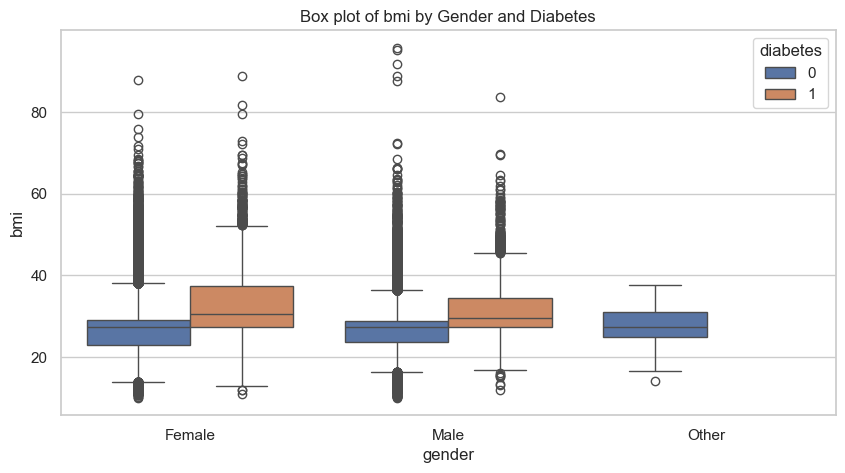

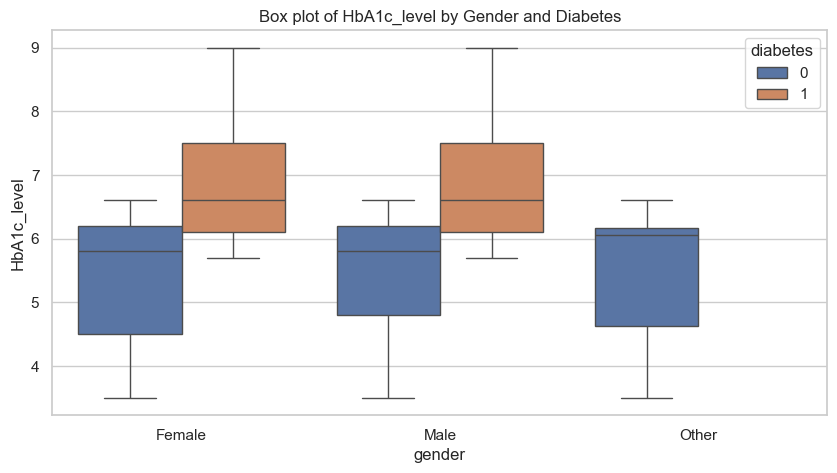

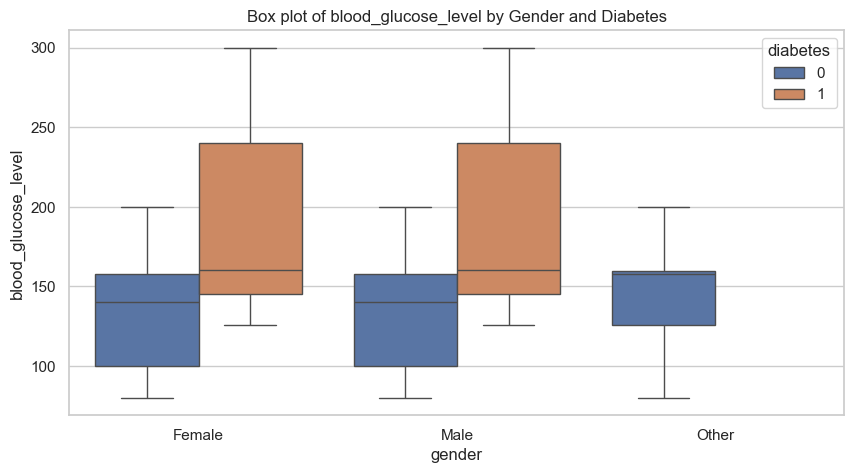

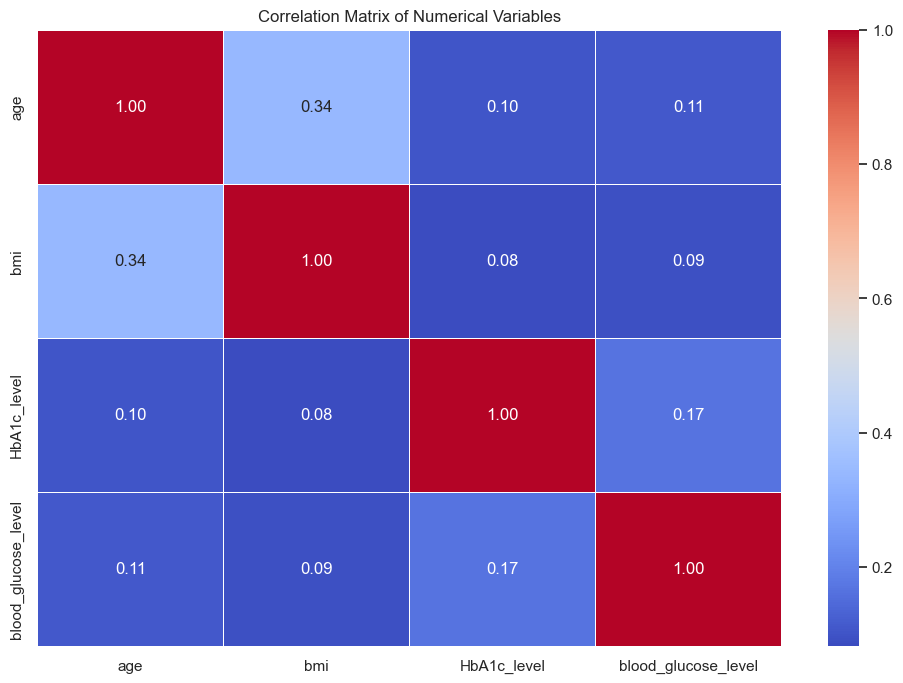

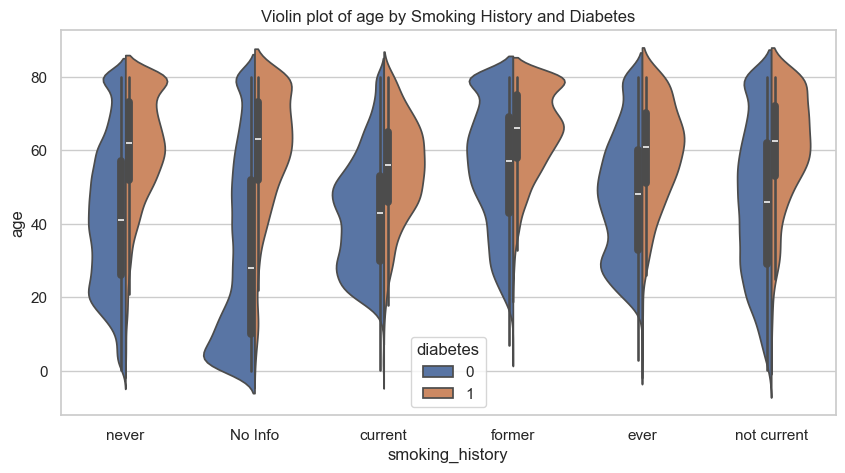

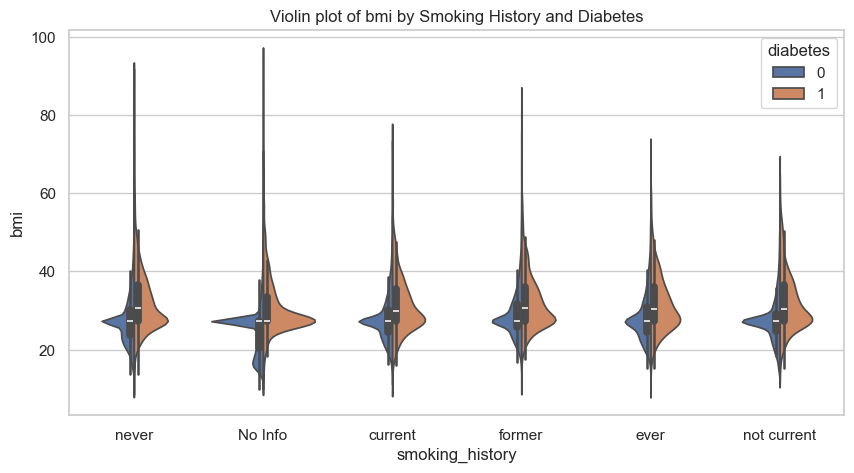

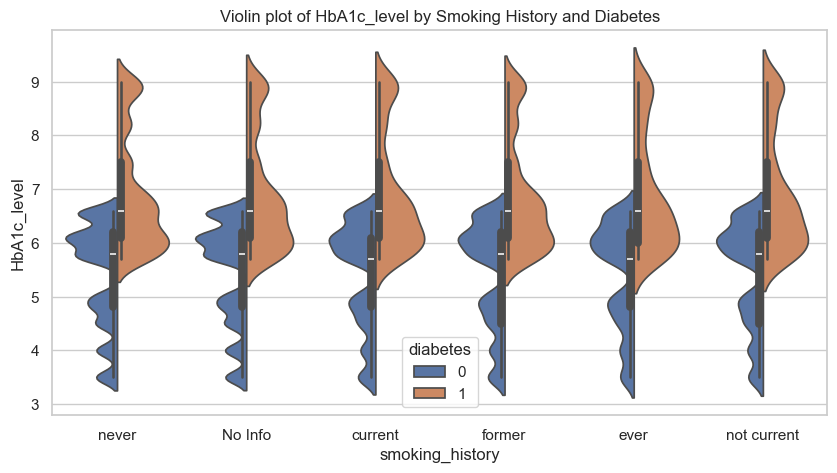

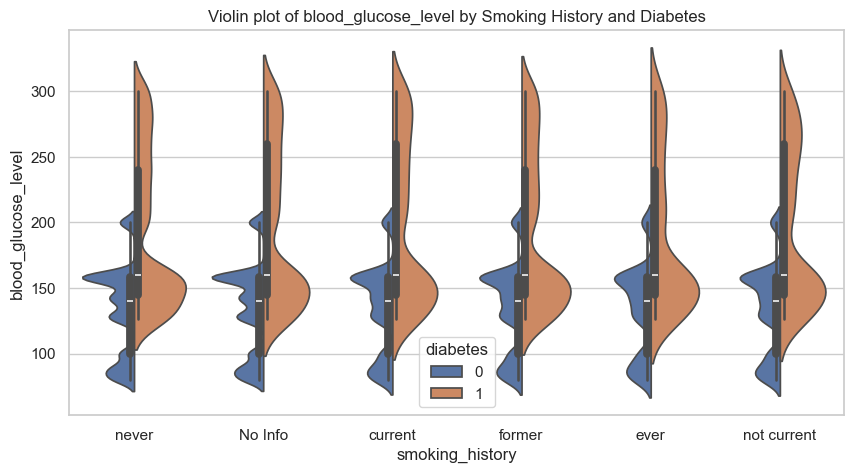

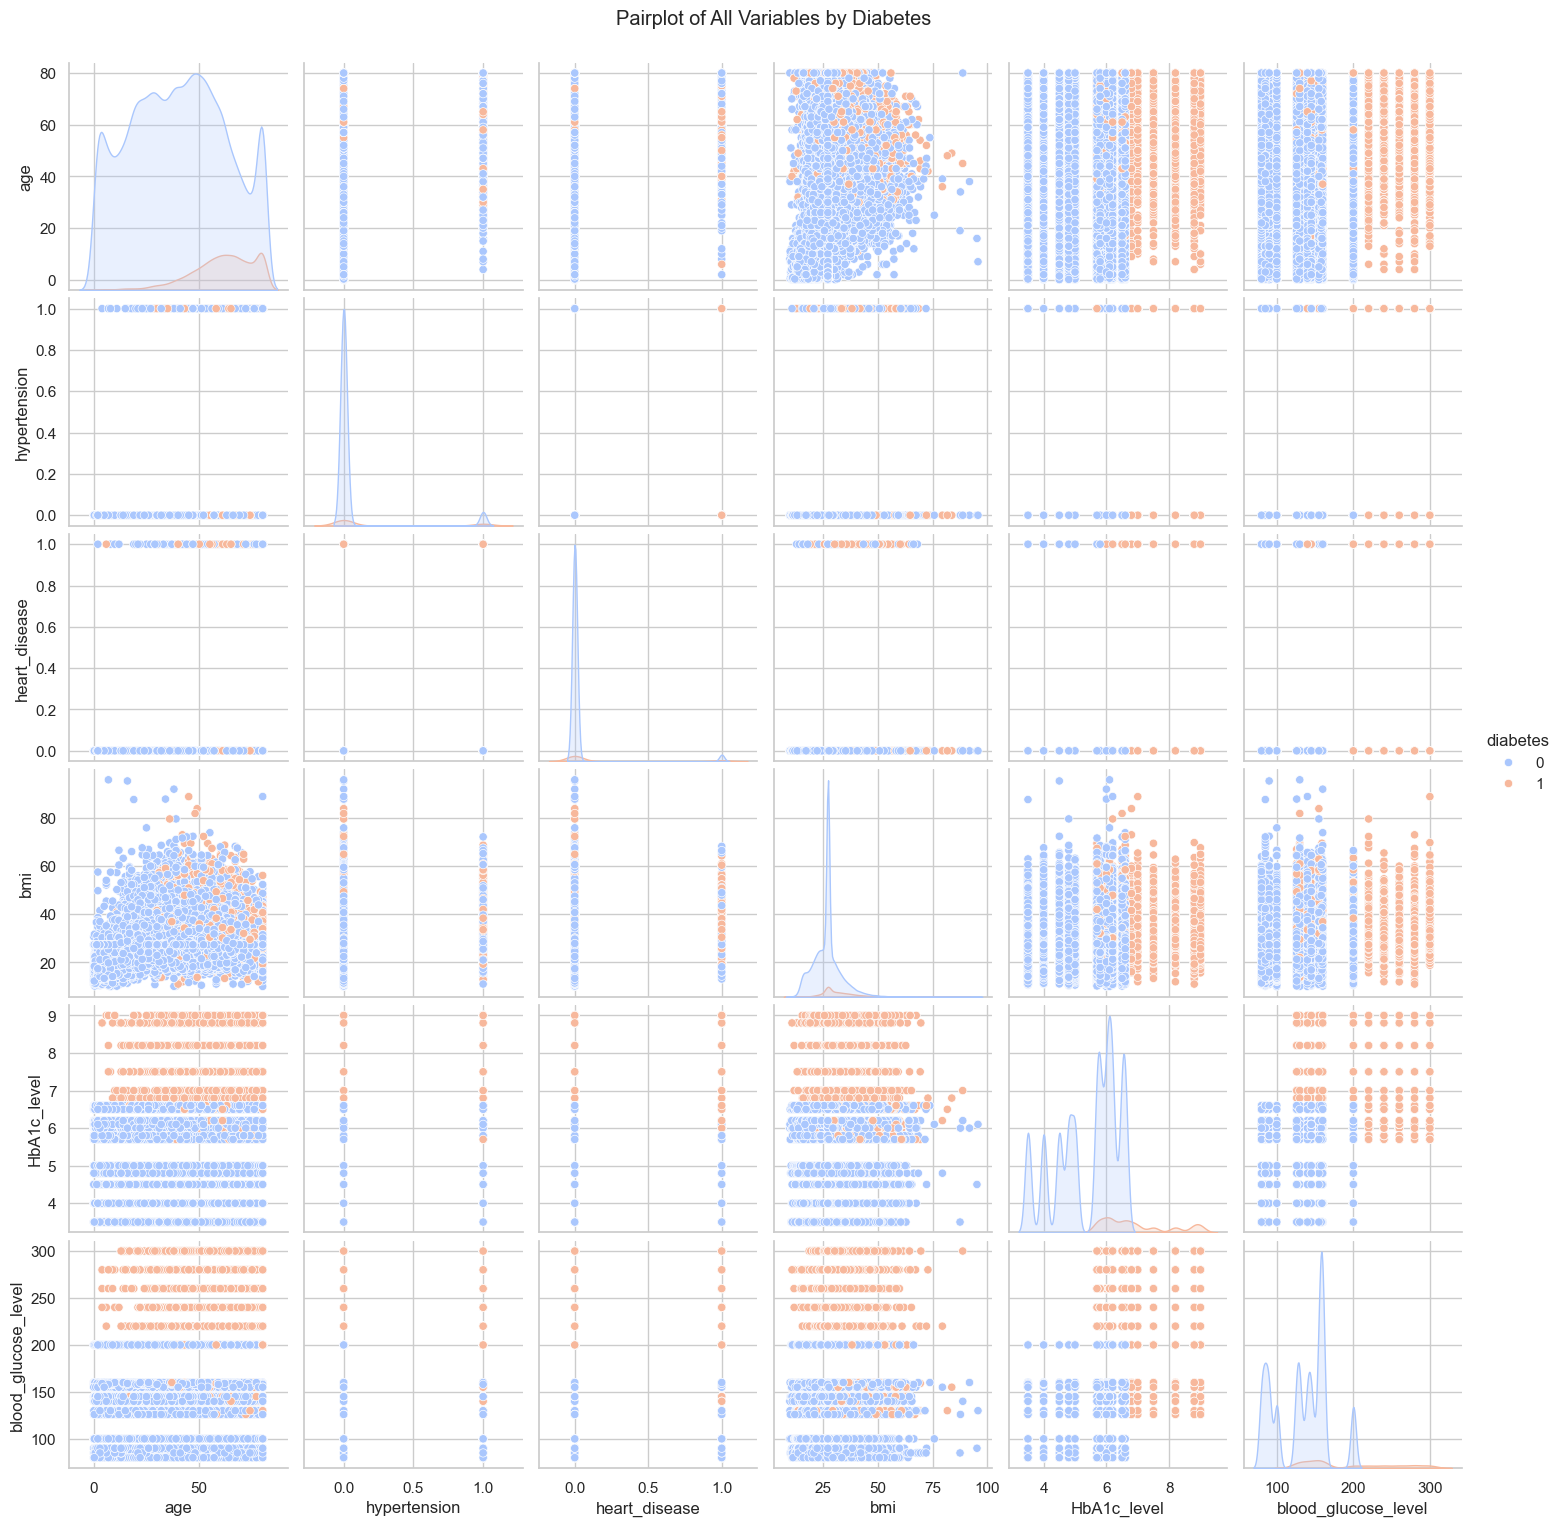

In [6]:
# Visualization of Relationships

# Scatter plots to visualize relationships between numerical variables
sns.pairplot(data, vars=numerical_columns, hue='diabetes', palette='coolwarm')
plt.suptitle('Pairplot of Numerical Variables by Diabetes', y=1.02)
plt.show()

# Box plots to visualize the distribution of numerical variables by gender
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='gender', y=column, hue='diabetes', data=data)
    plt.title(f'Box plot of {column} by Gender and Diabetes')
    plt.show()

# Heatmap to visualize the correlation between numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Violin plots to visualize the distribution of numerical variables by smoking history
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='smoking_history', y=column, hue='diabetes', data=data, split=True)
    plt.title(f'Violin plot of {column} by Smoking History and Diabetes')
    plt.show()

# Pairplot to visualize relationships between all variables
sns.pairplot(data, hue='diabetes', palette='coolwarm')
plt.suptitle('Pairplot of All Variables by Diabetes', y=1.02)
plt.show()